## Welcome to The Milestone Project: Bit Coin Price Prediction using Time Series Analysis 💰📈

In [1]:
!wget https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/Bitcoin_Historical_Data_Investing.com_India.csv

--2023-11-06 03:37:52--  https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/Bitcoin_Historical_Data_Investing.com_India.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265320 (259K) [text/plain]
Saving to: ‘Bitcoin_Historical_Data_Investing.com_India.csv’

Bitcoin_Historical_ 100%[===================>] 259.10K  --.-KB/s    in 0.02s   

2023-11-06 03:37:52 (11.5 MB/s) - ‘Bitcoin_Historical_Data_Investing.com_India.csv’ saved [265320/265320]



In [2]:
!wget https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/helper_functions.py

--2023-11-06 03:37:52--  https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4395 (4.3K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.29K  --.-KB/s    in 0s      

2023-11-06 03:37:53 (64.8 MB/s) - ‘helper_functions.py’ saved [4395/4395]



## Importing time series with pandas

In [3]:
import pandas as pd

# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('/content/Bitcoin_Historical_Data_Investing.com_India.csv',
                 parse_dates = ['Date'],  #  to specify which columns contain date or datetime information. In this case, it's set to ["Date"], indicating that the "Date" column should be treated as datetime data.
)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.sort_values(by="Date", ascending=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Price'] = df['Price'].str.replace(',', '').astype('float32')

df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2013-10-01,140.300003,141.9,144.4,139.4,9.57K,-1.13%
2013-10-02,123.000000,140.3,141.9,109.7,111.32K,-12.33%
2013-10-03,131.000000,123.0,132.0,120.1,35.27K,6.50%
2013-10-04,136.800003,131.0,139.8,128.5,18.51K,4.45%
2013-10-05,136.699997,136.8,138.0,135.3,5.00K,-0.09%


In [4]:
df.index.dtype, df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2013-10-01 to 2023-10-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3653 non-null   float32
 1   Open      3653 non-null   object 
 2   High      3653 non-null   object 
 3   Low       3653 non-null   object 
 4   Vol.      3653 non-null   object 
 5   Change %  3653 non-null   object 
dtypes: float32(1), object(5)
memory usage: 185.5+ KB


(dtype('<M8[ns]'), None)

In [5]:
# Only want price for each day
bitcoin_prices = pd.DataFrame(df['Price'])
bitcoin_prices.head()

,Price
Date,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,131.000000
2013-10-04,136.800003
2013-10-05,136.699997


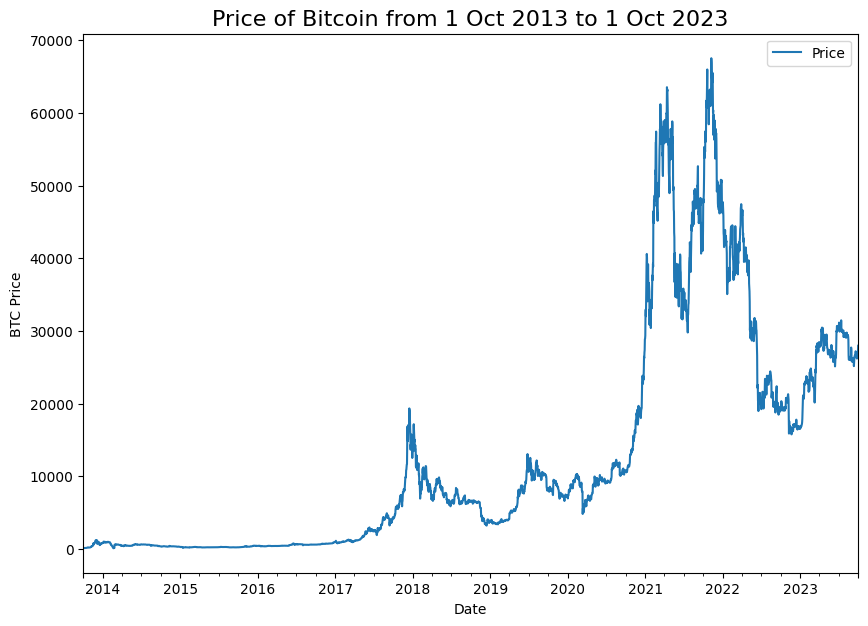

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 1 Oct 2023', fontsize=16)
plt.legend()

In [7]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([140.3, 123. , 131. , 136.8, 136.7, 137.8, 135.8, 136.5, 139.5,
        140.4], dtype=float32))

### Smoothing the time series curve

A moving-average model can be fit in the context of time-series analysis by smoothing the time series curve by computing the average of all data points in a fixed-length window.
This technique is known as Moving Average Smoothing and can be used for data preparation, feature engineering, and forecasting.

> 📖 **Resources:** https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [8]:
rolling = bitcoin_prices.rolling(window=3)
# rolling[:5]
rolling_mean = rolling.mean()
rolling_mean.head()

,Price
Date,
2013-10-01,NaN
2013-10-02,NaN
2013-10-03,131.433334
2013-10-04,130.266668
2013-10-05,134.833333


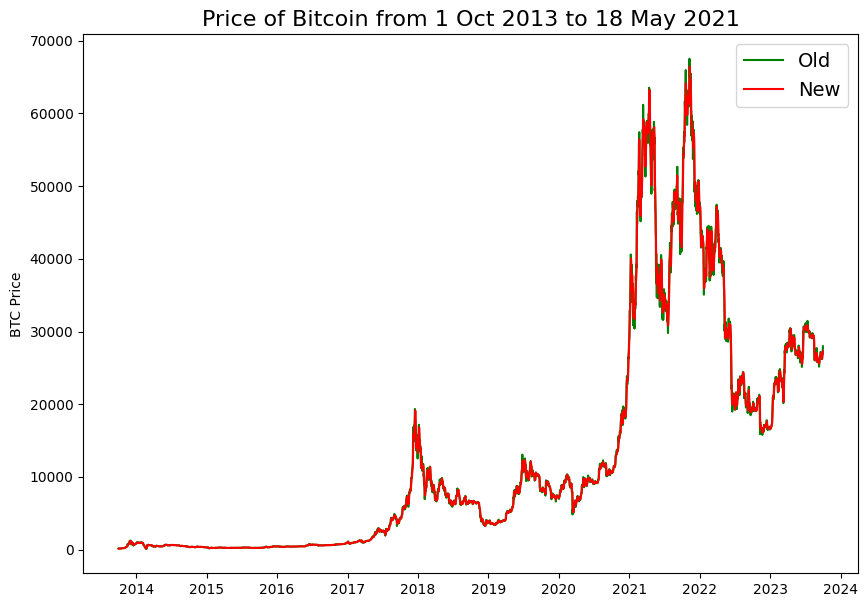

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, bitcoin_prices, color='green', label='Old')
plt.plot(timesteps, rolling_mean, color='red', label='New')
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14)

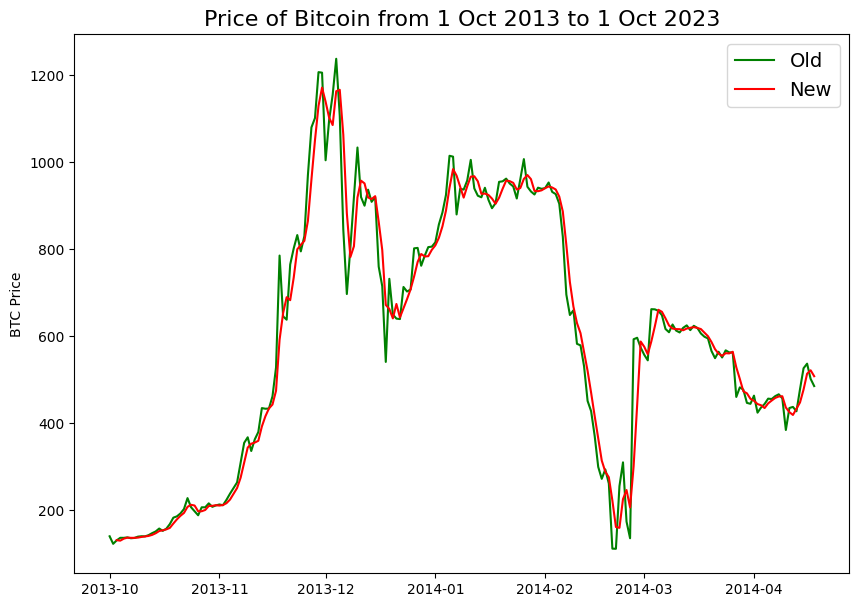

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps[:200], bitcoin_prices[:200], color='green', label='Old')
plt.plot(timesteps[:200], rolling_mean[:200], color='red', label='New')
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 1 Oct 2023', fontsize=16)
plt.legend(fontsize=14)

In [11]:
timesteps = rolling_mean.index.to_numpy()
prices = rolling_mean['Price'].to_numpy()

split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2922, 731, 2922, 731)

### Import some important functions from helper_functions.py

In [12]:
from helper_functions import plot_time_series, mean_absolute_scaled_error, get_labelled_windows, make_windows, make_train_test_splits, make_preds, evaluate_preds

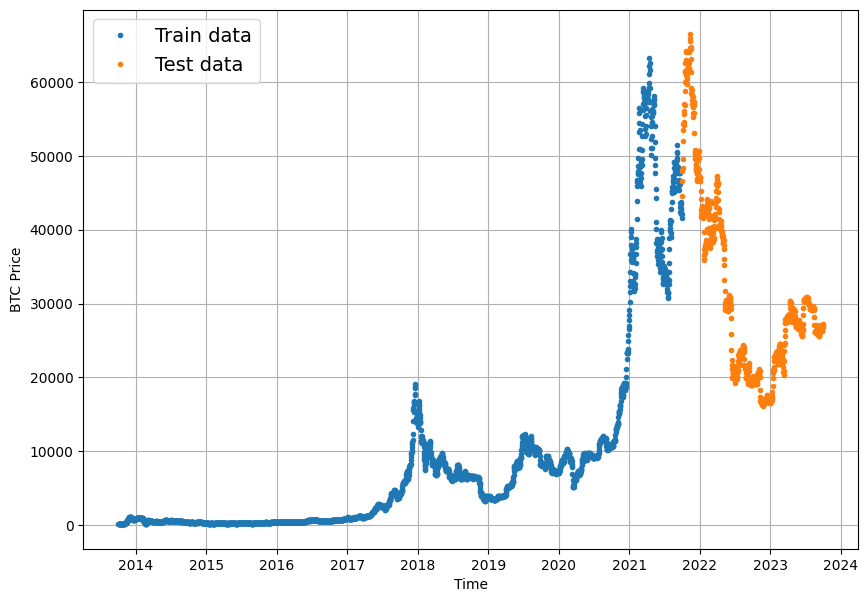

In [13]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

there are two terms you should be familiar with, **horizon** and **window**.
  * **horizon** = number of timesteps to predict into future
  * **window** = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

## Model 0: Naive forecast (baseline)

let's start with a baseline.

One of the most common baseline models for time series forecasting, the naive model (also called the [naive forecast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)), requires no training at all.

That's because all the naive model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep `t` (y-hat) is equal to the value at timestep `t-1` (the previous timestep).

In an open system (like a stock market or crypto market), you'll often find beating the naive forecast with *any* kind of model is quite hard.

> 🔑 **Note:** For the sake of this notebook, an **open system** is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a **closed system** the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in **open systems** is generally quite poor.

In [14]:
y_test[:10], y_test[-10:]

(array([44502.03385417, 46545.39973958, 48004.33333333, 48364.76692708,
        49632.234375  , 52006.60026042, 53525.46614583, 54340.59895833,
        54213.69921875, 54514.96614583]),
 array([26758.96679688, 26577.03320312, 26470.86653646, 26377.79947917,
        26257.69986979, 26295.89973958, 26535.86653646, 26766.16666667,
        26965.03320312, 27282.33333333]))

In [15]:
# Create a naive forecast
naive_forecast = y_test[:-1]  # Naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([44502.03385417, 46545.39973958, 48004.33333333, 48364.76692708,
        49632.234375  , 52006.60026042, 53525.46614583, 54340.59895833,
        54213.69921875, 54514.96614583]),
 array([26968.06640625, 26758.96679688, 26577.03320312, 26470.86653646,
        26377.79947917, 26257.69986979, 26295.89973958, 26535.86653646,
        26766.16666667, 26965.03320312]))

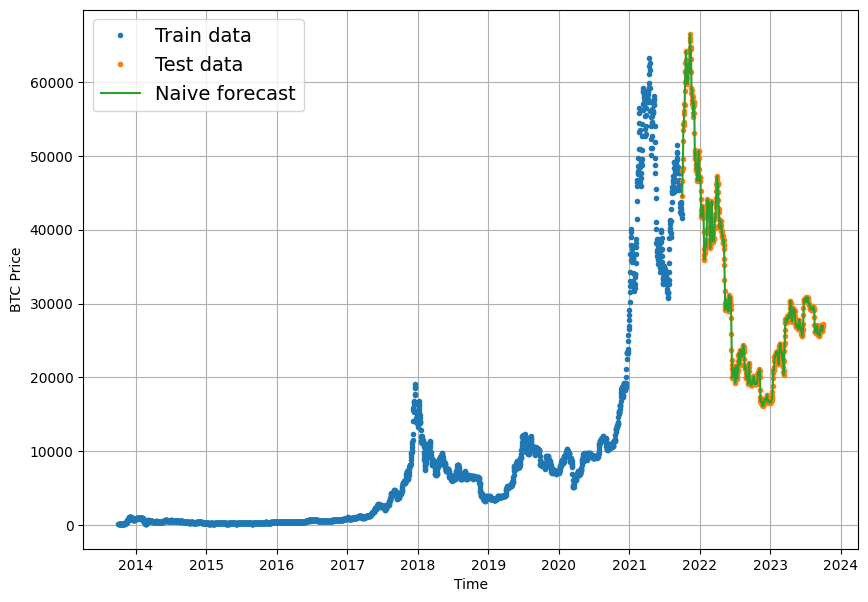

In [16]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

Let's zoom in to take a better look.

In [17]:
len(y_test)

731

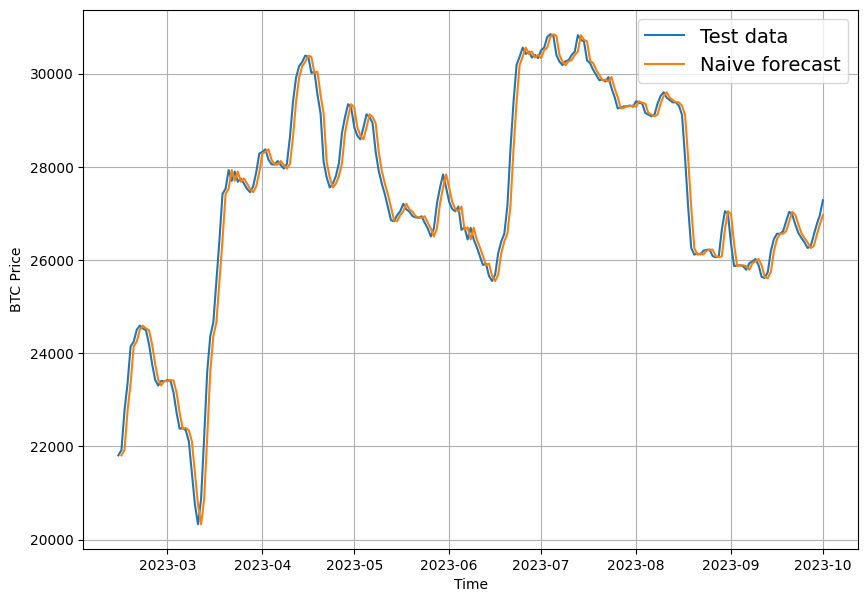

In [18]:
plt.figure(figsize=(10, 7))
offset = 500 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, format='-', label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

## Evaluating a time series model

In [19]:
# Let's get Tensorflow!
import tensorflow as tf

And since TensorFlow doesn't have a ready made version of MASE (mean aboslute scaled error), how about we create our own?

We'll adopt it from [sktime](https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.performance_metrics.forecasting.mean_absolute_scaled_error.html)'s (Scikit-Learn for time series) `MeanAbsoluteScaledError` class which calculates the MASE.

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 392.59882,
 'mse': 349755.78,
 'rmse': 591.40155,
 'mape': 1.2235622,
 'mase': 1.0058013}

Alright, looks like we've got some baselines to beat.

Taking a look at the naive forecast's MAE, it seems on average each forecast is ~$392 different than the actual Bitcoin price.

In [21]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

31007.885374362315

In [22]:
bitcoin_prices = rolling_mean.dropna()
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2920, 731, 2920, 731)

## Format Data Part 2: Windowing dataset

Why do we window?

Windowing is a method to turn a time series dataset into **supervised learning problem**.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) might look like:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

Let's build some functions which take in a univariate time series and turn it into windows and horizons of specified sizes.

In [23]:
len(y_train)

2920

In [24]:
# What we want to do with our Bitcoin data
print(f'We want to use: {prices[:7]} to predict this: {prices[7]}')

We want to use: [131.43333435 130.26666768 134.83333333 137.10000102 136.76666768
 136.70000203 137.26666768] to predict this: 138.79999796549478


In [25]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [26]:
# Test out the window lebelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")
test_window, test_label

Window: [1 2 3 4 5 6 7] -> Label: 8


(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

Now we need a way to make windows for an entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing

Let's write a function which:
1. Creates a window step of specific window size, for example: `[[0, 1, 2, 3, 4, 5, 6, 7]]`
2. Uses NumPy indexing to create a 2D of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```
3. Uses the 2D array of multuple window steps to index on a target series
4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

> 📖 **Resource:** The function created below has been adapted from Syafiq Kamarul Azman's article [*Fast and Robust Sliding Window Vectorization with NumPy*](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).

In [27]:
import numpy as np
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [28]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650]]), (3644, 8))


(3644, 3644)

Of course we have to visualize it!

In [29]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [131.43333435 130.26666768 134.83333333 137.10000102 136.76666768
 136.70000203 137.26666768] -> Label: [138.79999797]
Window: [130.26666768 134.83333333 137.10000102 136.76666768 136.70000203
 137.26666768 138.79999797] -> Label: [140.]
Window: [134.83333333 137.10000102 136.76666768 136.70000203 137.26666768
 138.79999797 140.        ] -> Label: [141.1333313]


In [30]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [26758.96679688 26577.03320312 26470.86653646 26377.79947917
 26257.69986979 26295.89973958 26535.86653646] -> Label: [26766.16666667]
Window: [26577.03320312 26470.86653646 26377.79947917 26257.69986979
 26295.89973958 26535.86653646 26766.16666667] -> Label: [26965.03320312]
Window: [26470.86653646 26377.79947917 26257.69986979 26295.89973958
 26535.86653646 26766.16666667 26965.03320312] -> Label: [27282.33333333]


## Turning windows into training and test sets


In [31]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2915, 729, 2915, 729)

In [32]:
train_windows[:5], train_labels[:5]

(array([[131.43333435, 130.26666768, 134.83333333, 137.10000102,
         136.76666768, 136.70000203, 137.26666768],
        [130.26666768, 134.83333333, 137.10000102, 136.76666768,
         136.70000203, 137.26666768, 138.79999797],
        [134.83333333, 137.10000102, 136.76666768, 136.70000203,
         137.26666768, 138.79999797, 140.        ],
        [137.10000102, 136.76666768, 136.70000203, 137.26666768,
         138.79999797, 140.        , 141.1333313 ],
        [136.76666768, 136.70000203, 137.26666768, 138.79999797,
         140.        , 141.1333313 , 143.5       ]]),
 array([[138.79999797],
        [140.        ],
        [141.1333313 ],
        [143.5       ],
        [147.2666626 ]]))

In [33]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

for a fair comparison, we want to compare each model's best performance against each model's best performance.

For example, if `model_1` performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model from epoch 55 to compare to other models rather than the version of the model from epoch 100.

And the same goes for each of our other models: compare the best against the best.

To take of this, we'll implement a [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback.

> 🔑 **Note:** Because of the size of the dataset (smaller than usual), you'll notice our modelling experiment results fluctuate quite a bit during training (hence the implementation of the `ModelCheckpoint` callback to save the best model).

In [34]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, # output with a limited amount of text only
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

> 🔑 **Note:** As always, many of the values for machine learning problems are experimental. A reminder that the values you can set yourself in a machine learning algorithm (the hidden units, the batch size, horizon size, window size) are called [**hyperparameters**](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning). And experimenting to find the best values for hyperparameters is called **hyperparameter tuning**. Where as parameters learned by a model itself (patterns in the data, formally called weights & biases) are referred to as **parameters**.

In [35]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')  # linear activation is the same as having no activation
], name='model_1_dense')  # name our model so we can save it

# 2. Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,  # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
23/23 [==============================] - 9s 71ms/step - loss: 2423.9138 - mae: 2423.9138 - mse: 35029204.0000 - val_loss: 2474.8181 - val_mae: 2474.8181 - val_mse: 9346206.0000
Epoch 2/100
23/23 [==============================] - 1s 62ms/step - loss: 493.7878 - mae: 493.7878 - mse: 1287340.6250 - val_loss: 1064.7853 - val_mae: 1064.7853 - val_mse: 2619729.7500
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 414.2689 - mae: 414.2689 - mse: 988806.1250 - val_loss: 1240.9949 - val_mae: 1240.9949 - val_mse: 2931813.2500
Epoch 4/100
23/23 [==============================] - 1s 48ms/step - loss: 373.7134 - mae: 373.7134 - mse: 831597.6250 - val_loss: 932.9142 - val_mae: 932.9142 - val_mse: 1917687.3750
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 351.8556 - mae: 351.8556 - mse: 725103.6875 - val_loss: 1353.3734 - val_mae: 1353.3734 - val_mse: 3131982.0000
Epoch 6/100
23/23 [==============================] - 1s 66ms/step - loss:

In [36]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 372.7320 - mae: 372.7320 - mse: 299892.4688


[372.7319641113281, 372.7319641113281, 299892.46875]

In [37]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 363.5963 - mae: 363.5963 - mse: 291241.3125


[363.5963134765625, 363.5963134765625, 291241.3125]

## Making forecasts with a model (on the test dataset)


In [38]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

23/23 [==============================] - 0s 2ms/step


(729,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([47386.477, 48966.547, 48980.098, 50108.266, 52498.85 , 54217.914,
        54987.64 , 54522.902, 54629.58 , 55810.31 ], dtype=float32)>)

> 🔑 **Note:** With these outputs, our model isn't *forecasting* yet. It's only making predictions on the test dataset. Forecasting would involve a model making predictions into the future, however, the test dataset is only a pseudofuture.

Now we've got some prediction values, let's use the `evaluate_preds()` we created before to compare them to the ground truth.

In [39]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([729]), TensorShape([729]))

In [40]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 363.59637,
 'mse': 291241.3,
 'rmse': 539.6678,
 'mape': 1.1297927,
 'mase': 0.935016}

In [41]:
naive_results

{'mae': 392.59882,
 'mse': 349755.78,
 'rmse': 591.40155,
 'mape': 1.2235622,
 'mase': 1.0058013}

In [42]:
test_labels.shape

(729, 1)

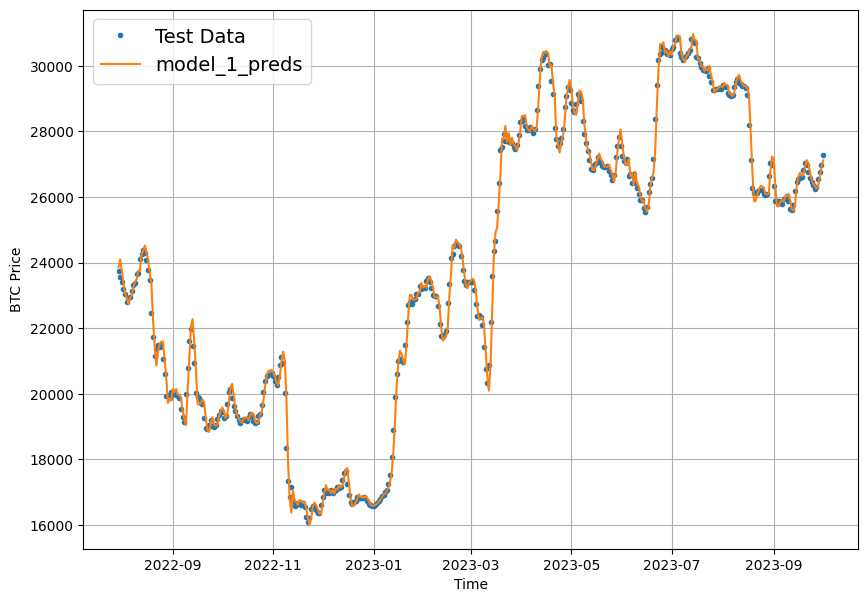

In [43]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
# Account for the tes_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label='model_1_preds')

What's wrong with these predictions?

As mentioned before, they're on the test dataset. So they're not actual forecasts.


## Model 2: Dense (window = 30, horizon = 1)


In [44]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30  # use 30 timesteps in past

In [45]:
# Make windows data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]), array([[3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628,
        3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639,
        3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629,
        3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640,
        3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3620, 3621, 36

(3621, 3621)

In [46]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2896, 725, 2896, 725)

In [47]:
train_windows[:3], train_labels[:3]

(array([[131.43333435, 130.26666768, 134.83333333, 137.10000102,
         136.76666768, 136.70000203, 137.26666768, 138.79999797,
         140.        , 141.1333313 , 143.5       , 147.2666626 ,
         152.33333333, 154.10000102, 156.16667175, 159.56667074,
         169.66667175, 179.16667175, 187.33333842, 193.96666972,
         207.93333435, 212.66666667, 210.96666463, 197.83333333,
         197.79999797, 200.79999797, 209.93332926, 210.29999797,
         211.73333232, 210.86666361],
        [130.26666768, 134.83333333, 137.10000102, 136.76666768,
         136.70000203, 137.26666768, 138.79999797, 140.        ,
         141.1333313 , 143.5       , 147.2666626 , 152.33333333,
         154.10000102, 156.16667175, 159.56667074, 169.66667175,
         179.16667175, 187.33333842, 193.96666972, 207.93333435,
         212.66666667, 210.96666463, 197.83333333, 197.79999797,
         200.79999797, 209.93332926, 210.29999797, 211.73333232,
         210.86666361, 212.09999593],
        [134.8

Data prepared!

Now let's construct `model_2`, a model with the same architecture as `model_1` as well as the same training routine.

In [48]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

# Compile
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [49]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 1154.6044


1154.6043701171875

In [50]:
# Load in the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 4ms/step - loss: 427.8167


427.8166809082031

In [51]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

23/23 [==============================] - 0s 3ms/step


In [52]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([725]), TensorShape([725]))

In [53]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 427.81665,
 'mse': 403502.7,
 'rmse': 635.2186,
 'mape': 1.3405218,
 'mase': 1.1158812}

In [54]:
model_1_results

{'mae': 363.59637,
 'mse': 291241.3,
 'rmse': 539.6678,
 'mape': 1.1297927,
 'mase': 0.935016}

It looks like `model_2` performs worse than the naive model as well as `model_1`!

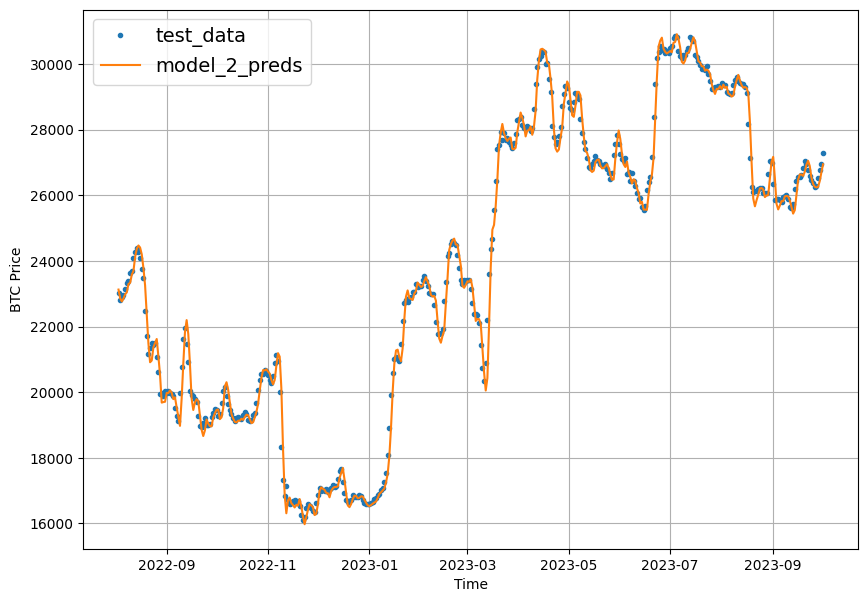

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

Let's try and predict 7 days ahead given the previous 30 days.



In [56]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]]), array([[3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622,
        3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633,
        3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644,
        3645, 3646, 3647, 3648],
       [3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623,
 

(3615, 3615)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2892, 723, 2892, 723)

In [58]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [59]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 1242.0739


1242.0738525390625

In [60]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 1236.0345


1236.0345458984375

In this case, the error will be higher because we're predicting 7 steps at a time.

This makes sense though because the further you try and predict, the larger your error will be (think of trying to predict the weather 7 days in advance).

Let's make predictions with our model using the `make_preds()` function and evaluate them using the `evaluate_preds()` function.

In [61]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[45779.94 , 46154.297, 44976.203, 44583.758, 43985.5  , 43951.676,
        44892.527],
       [47247.992, 47729.203, 46576.03 , 45994.63 , 46088.004, 45824.242,
        46679.754],
       [48082.926, 48347.188, 47735.58 , 46851.965, 47343.344, 47282.88 ,
        47804.914],
       [49388.49 , 48860.31 , 49090.88 , 47970.855, 48232.992, 48932.73 ,
        48753.11 ],
       [51484.637, 50901.37 , 51464.938, 50337.47 , 50187.785, 51090.32 ,
        50420.37 ]], dtype=float32)>

In [62]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1236.0347,
 'mse': 3602130.2,
 'rmse': 1408.8156,
 'mape': 3.9603384,
 'mase': 3.1992548}

In [63]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1236.0347,
 'mse': 3602130.2,
 'rmse': 1408.8156,
 'mape': 3.9603384,
 'mase': 3.1992548}

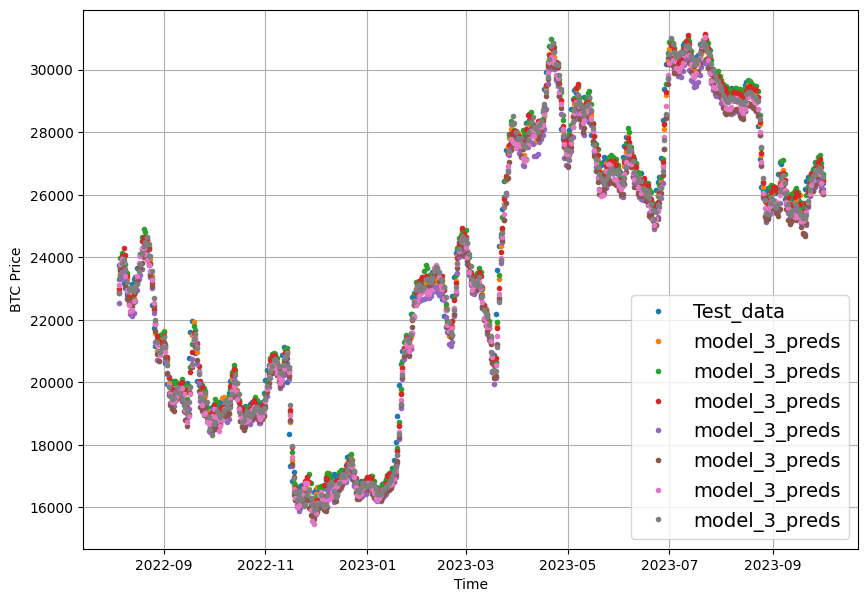

In [64]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

When we try to plot our multi-horizon predicts, we don't get a good looking plot.

Again, we can fix this by aggregating our model's predictions.

> 🔑 **Note:** Aggregating the predictions (e.g. reducing a 7-day horizon to one value such as the mean) loses information from the original prediction. As in, the model predictions were trained to be made for 7-days but by reducing them to one, we gain the ability to plot them visually but we lose the extra information contained across multiple days.

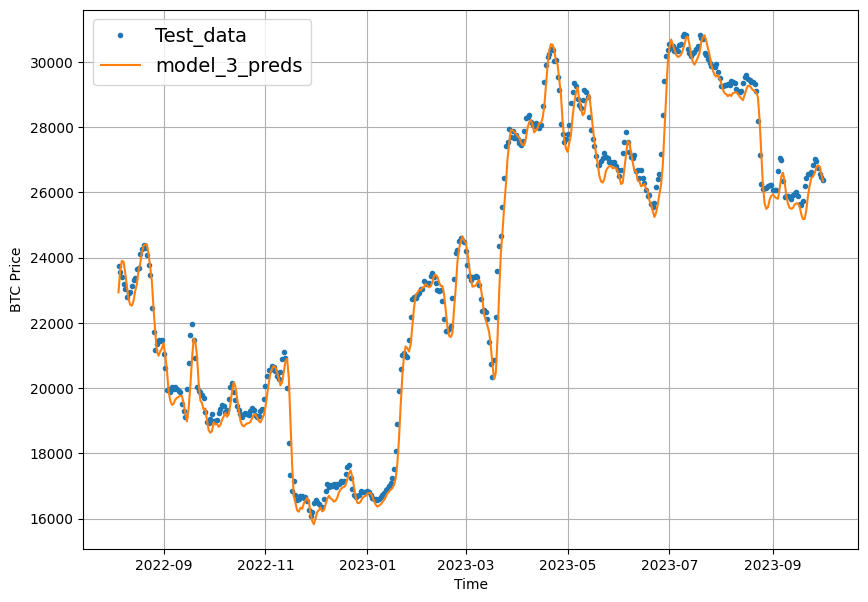

In [65]:
offset = 300
plt.figure(figsize=(10, 7))

# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

### Which of our models is performing best so far?

So far, we've trained 3 models which use the same architecture but use different data inputs.

Let's compare them with the naive model to see which model is performing the best so far.

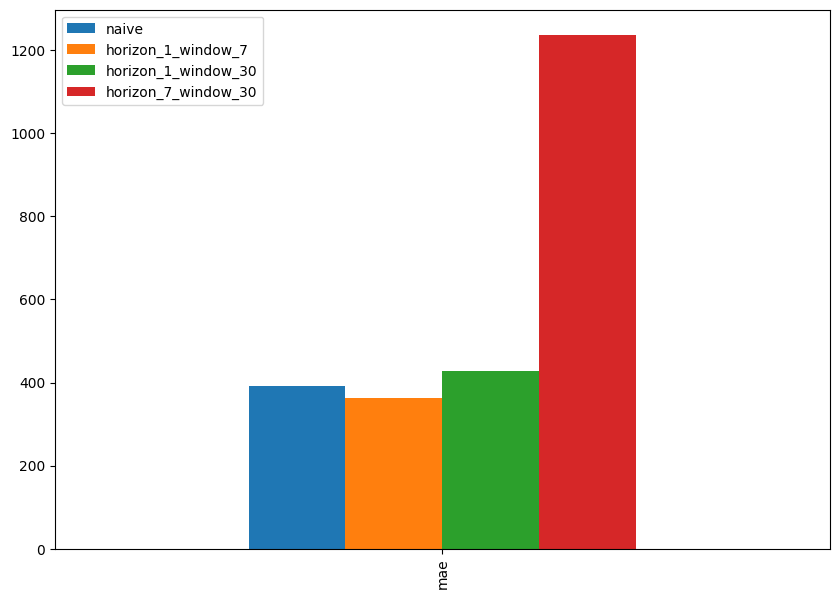

In [66]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

our naive model is performing likely best (it's very hard to beat a naive model in open systems) but the dense model with a horizon of 1 and a window size of 7 looks to be performing good.

Because of this, let's use `HORIZON=1` and `WINDOW_SIZE=7` for our next modelling experiments (in other words, we'll use the previous week of Bitcoin prices to try and predict the next day).

> 🔑 **Note:** You might be wondering, why are the naive results so good? One of the reasons could be due the presence of **autocorrelation** in the data. If a time series has **autocorrelation** it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naive model will often get fairly good results.

> **Autocorrelation:** Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.

> 📖 **Resource:** For more on how autocorrelation influences a model's predictions, see the article [*How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls*](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)

## Model 4: Conv1D

This time, we'll be using a Conv1D model. Conv1D models can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

> bitcoin prediction in seq2seq terms

> Framing Bitcoin forecasting in seq2seq (sequence to sequence) terms. Using a window size of 7 and a horizon of one results in a many to one problem. Using a window size of >1 and a horizon of >1 results in a many to many problem.

Before we build a Conv1D model, let's recreate our datasets.

In [67]:
HORIZON = 1   # predict next day of bitcoin prices
WINDOW_SIZE = 7   # use previous week worth data

In [68]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650]]), (3644, 8))


(3644, 3644)

In [69]:
# Create train test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2915, 2915, 729, 729)

Data windowed!

Now, since we're going to be using [Conv1D layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), we need to make sure our input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: `(batch_size, timesteps, input_dim)`.

* `timesteps = WINDOW_SIZE` - the `timesteps` is also often referred to as `features`, our features are the previous `WINDOW_SIZE` values of Bitcoin
* `input_dim = HORIZON` - our model views `WINDOW_SIZE` (one week) worth of data at a time to predict `HORIZON` (one day)

Right now, our data has the `timesteps` dimension ready but we'll have to adjust it to have the `input_dim` dimension.

In [70]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [71]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([131.43333435, 130.26666768, 134.83333333, 137.10000102,
       136.76666768, 136.70000203, 137.26666768])>

In [72]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps

In [73]:
from tensorflow.python.ops.array_ops import ExpandDims
# Test out our lambda layer
print(f'Original shape: {x.shape}') # (WINDOW_SIZE)
print(f'Expanded shape: {expand_dims_layer(x).shape}')  # output = ...?
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[131.43333]
 [130.26666]
 [134.83333]
 [137.1    ]
 [136.76666]
 [136.7    ]
 [137.26666]]


In [74]:
x.numpy()

array([131.43333435, 130.26666768, 134.83333333, 137.10000102,
       136.76666768, 136.70000203, 137.26666768])

In [75]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=256, kernel_size=5, strides=2, padding="same", activation="relu"),
  layers.Conv1D(filters=256, kernel_size=5, strides=2, padding="same", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

The Lambda layer appears the same as any other regular layer.

In [76]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 256)            9216      
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            327936    
                                                                 
 dense_6 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 337409 (1.29 MB)
Trainable params: 337409 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Evaluate model...
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 4ms/step - loss: 704.1821


704.18212890625

In [79]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 340.4112


340.4111633300781

In [80]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47785.87 , 48817.887, 48552.688, 49778.152, 52831.906, 54576.953,
       54790.44 , 54101.184, 54326.715, 55974.71 ], dtype=float32)>

In [81]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 340.4112,
 'mse': 253359.08,
 'rmse': 503.34787,
 'mape': 1.0530462,
 'mase': 0.8753935}

## Model 5: RNN (LSTM)

we can also use a recurrent neural network to model our sequential time series data.

Let's reuse the same data we used for the Conv1D model, except this time we'll create an [LSTM-cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) powered RNN to model our Bitcoin data.

Once again, one of the most important steps for the LSTM model will be getting our data into the right shape.

The [`tf.keras.layers.LSTM()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) layer takes a tensor with `[batch, timesteps, feature]` dimensions.

To fix this, just like we did with the `Conv1D` model, we can use a `tf.keras.layers.Lambda()` layer to adjust the shape of our input tensors to the LSTM layer.








In [82]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
print(x.shape)

x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
print(x.shape)

# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Dense(32, activation="relu")(x)

output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

(None, 1, 7)


(None, 128)


In [83]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

23/23 [==============================] - 1s 3ms/step - loss: 339.6612


339.66119384765625

In [84]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

23/23 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47438.773, 48653.547, 48927.816, 49910.88 , 52632.77 , 54143.523,
       54607.85 , 54455.11 , 54408.645, 55788.867], dtype=float32)>

In [85]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 339.6612,
 'mse': 254523.98,
 'rmse': 504.5037,
 'mape': 1.0583049,
 'mase': 0.8734648}

it seems even with an LSTM-powered RNN we weren't able to beat our naive models results.

Perhaps adding another variable will help?

> 🔑 **Note:** because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.


## Make a multivariate time series

What would be better is if we passed our model something related to Bitcoin

This will be different for almost every time series you work on but in our case, we could try to see if the [Bitcoin block reward size](https://www.investopedia.com/terms/b/block-reward.asp) adds any predictive power to our model(s).

What is the Bitcoin block reward size?

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block

At its inception, the Bitcoin block reward size was 50.

But every four years or so, the Bitcoin block reward halves.

For example, the block reward size went from 50 (starting January 2009) to 25 on November 28 2012.

Let's encode this information into our time series data

> 🔑 **Note:** Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from **univariate** (only the historical price of Bitcoin) to **multivariate** (the price of Bitcoin as well as the block reward size).

In [86]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-03,131.433334
2013-10-04,130.266668
2013-10-05,134.833333
2013-10-06,137.100001
2013-10-07,136.766668


add another feature column, the block reward size.

First, we'll need to create variables for the different block reward sizes as well as the dates they came into play.

The following block rewards and dates were sourced from [cmcmarkets.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | - (expected 2024) |
| 1.5625 | - (expected 2028) |

> 🔑 **Note:** Since our Bitcoin historical data starts from 01 October 2013, none of the timesteps in our multivariate time series will have a block reward of 50.

In [87]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

We're going to get the days (indexes) for different block reward values.

This is important because if we're going to use multiple variables for our time series, they have to the same frequency as our original variable. For example, if our Bitcoin prices are daily, we need the block reward values to be daily as well.

> 🔑 **Note:** For using multiple variables, make sure they're the same frequency as each other. If your variables aren't at the same frequency (e.g. Bitcoin prices are daily but block rewards are weekly), you may need to transform them in a way that they can be used with your model.

In [88]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1010, 2412)

Now we can add another feature to our dataset `block_reward` (this gets lower over time so it may lead to increasing prices of Bitcoin).

In [89]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-03,131.433334,25
2013-10-04,130.266668,25
2013-10-05,134.833333,25
2013-10-06,137.100001,25
2013-10-07,136.766668,25


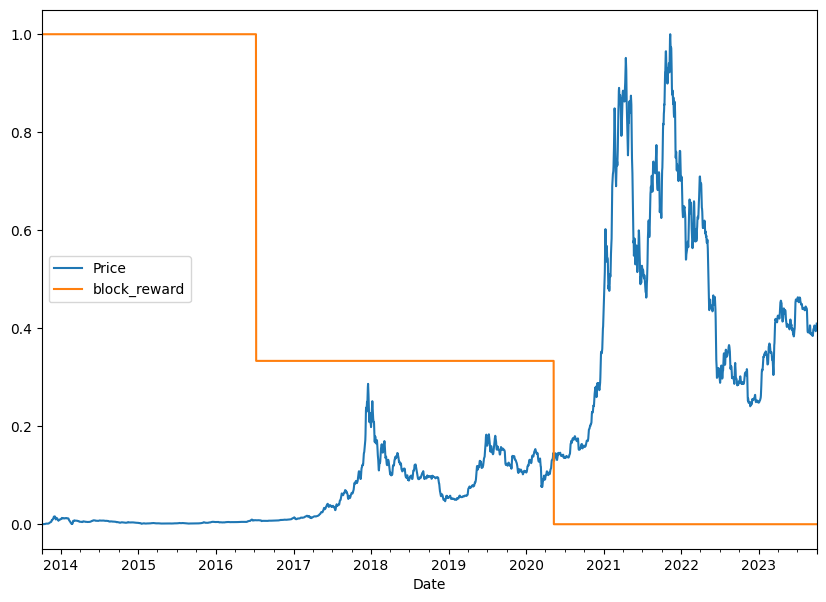

In [90]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we used some custom made functions to window our **univariate** time series.

we can leverage the [`pandas.DataFrame.shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) method to create a windowed **multivariate** time series.

The `shift()` method offsets an index by a specified number of periods.

In [91]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [92]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-03,131.433334,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-04,130.266668,25,131.433334,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-05,134.833333,25,130.266668,131.433334,NaN,NaN,NaN,NaN,NaN
2013-10-06,137.100001,25,134.833333,130.266668,131.433334,NaN,NaN,NaN,NaN
2013-10-07,136.766668,25,137.100001,134.833333,130.266668,131.433334,NaN,NaN,NaN
2013-10-08,136.700002,25,136.766668,137.100001,134.833333,130.266668,131.433334,NaN,NaN
2013-10-09,137.266668,25,136.700002,136.766668,137.100001,134.833333,130.266668,131.433334,NaN
2013-10-10,138.799998,25,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668,131.433334
2013-10-11,140.000000,25,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668


Now that we've got a windowed dataset, let's separate features (`X`) from labels (`y`).

Remember in our windowed dataset, we're trying to use the previous `WINDOW_SIZE` steps to predict `HORIZON` steps.

```
Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [93]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-10,25.0,137.266663,136.699997,136.766663,137.100006,134.833328,130.266663,131.433334
2013-10-11,25.0,138.800003,137.266663,136.699997,136.766663,137.100006,134.833328,130.266663
2013-10-12,25.0,140.000000,138.800003,137.266663,136.699997,136.766663,137.100006,134.833328
2013-10-13,25.0,141.133331,140.000000,138.800003,137.266663,136.699997,136.766663,137.100006
2013-10-14,25.0,143.500000,141.133331,140.000000,138.800003,137.266663,136.699997,136.766663


In [94]:
# View labels
y.head()

Date
2013-10-10    138.800003
2013-10-11    140.000000
2013-10-12    141.133331
2013-10-13    143.500000
2013-10-14    147.266663
Name: Price, dtype: float32

In [95]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2915, 2915, 729, 729)

## Model 6: Dense (multivariate time series)

By replicating the `model_1` architecture we'll be able to see whether or not adding the block reward feature improves or detracts from model performance.

In [96]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [97]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 302.1397


302.1397399902344

In [98]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([48077.34 , 48787.938, 48700.086, 50209.81 , 53584.332, 54951.496,
       54703.855, 54179.47 , 54522.035, 56346.906], dtype=float32)>

In [99]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 302.13977,
 'mse': 208110.88,
 'rmse': 456.1917,
 'mape': 0.9304093,
 'mase': 0.7769756}

In [100]:
model_1_results

{'mae': 363.59637,
 'mse': 291241.3,
 'rmse': 539.6678,
 'mape': 1.1297927,
 'mase': 0.935016}

It looks like the adding in the block reward may have helped our model slightly.


## Model 7: N-BEATS algorithm

So far we've tried a bunch of smaller models, models with only a couple of layers.

But one of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the [N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm](https://arxiv.org/pdf/1905.10437.pdf) does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (a forecasting competition).

we're going to be replicating the **generic architecture** of the N-BEATS algorithm (see section 3.3 of the N-BEATS paper).

We're not going to go through all of the details in the paper, instead we're going to focus on:
1. Replicating the model architecture in Figure 1 of the N-BEATS paper

2. Using the same hyperparameters as the paper which can be found in Appendix D of the N-BEATS paper

* Creating a custom layer for the `NBeatsBlock` by subclassing [`tf.keras.layers.Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
  * Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times (e.g. like a stack of N-BEATS blocks)
* Implementing a custom architecture using the Functional API
* Finding a paper related to our problem and seeing how it goes

> 🔑 **Note:** As you'll see in the paper, the authors state “N-BEATS is implemented and trained in TensorFlow”, that's what we'll be doing too!


### Building and testing an N-BEATS block layer

In [101]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Setting up the `NBeatsBlock` custom layer we see:
* The class inherits from `tf.keras.layers.Layer` (this gives it all of the methods assosciated with `tf.keras.layers.Layer`)
* The constructor (`def __init__(...)`) takes all of the layer hyperparameters as well as the `**kwargs` argument
  * The `**kwargs` argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, `input_shape`, `trainable` and `name`
* In the constructor, the block architecture layers are created:
  * The hidden layers are created as a stack of fully connected with `n_nuerons` hidden units layers with ReLU activation
  * The theta layer uses `theta_size` hidden units as well as linear activation
* The `call()` method is what is run when the layer is called:
  * It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)
  * After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: `input_size`) and forecast (forward predictions, shape: `horizon`) are returned


In [102]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [103]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [104]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19399506  0.18388587  0.60474813  0.37271816  0.18471098 -0.0907459
 -0.5448392 ]
Forecast: 0.03535197675228119


### Preparing data for the N-BEATS algorithm using `tf.data`

We've got the basic building block for the N-BEATS architecture ready to go.

But before we use it to replicate the entire N-BEATS generic architecture, let's create some data.

This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the `tf.data` API.

And because the N-BEATS algorithm is focused on univariate time series, we'll start by making training and test windowed datasets of Bitcoin prices (just as we've done above).


In [105]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [106]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-03,131.433334
2013-10-04,130.266668
2013-10-05,134.833333
2013-10-06,137.100001
2013-10-07,136.766668


In [107]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-10,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668,131.433334
2013-10-11,140.000000,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668
2013-10-12,141.133331,140.000000,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333
2013-10-13,143.500000,141.133331,140.000000,138.799998,137.266668,136.700002,136.766668,137.100001
2013-10-14,147.266663,143.500000,141.133331,140.000000,138.799998,137.266668,136.700002,136.766668


In [108]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2915, 2915, 729, 729)

Now let's convert them into TensorFlow `tf.data.Dataset`'s to ensure they run as fast as possible whilst training.

We'll do this by:
1. Turning the arrays in tensor Datasets using [`tf.data.Dataset.from_tensor_slices()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)
  * Note: `from_tensor_slices()` works best when your data fits in memory, for extremely large datasets, you'll want to look into using the [`TFRecord` format](https://www.tensorflow.org/tutorials/load_data/tfrecord)
2. Combine the labels and features tensors into a Dataset using [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)
3. Batch and prefetch the Datasets using [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) and [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch)
  * Batching and prefetching ensures the loading time from CPU (preparing data) to GPU (computing on data) is as small as possible

> 📖 **Resource:** For more on building highly performant TensorFlow data pipelines [*Better performance with the tf.data API*](https://www.tensorflow.org/guide/data_performance) guide.

In [109]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

Data prepared! Notice the input shape for the features `(None, 7)`, the `None` leaves space for the batch size where as the `7` represents the `WINDOW_SIZE`.

Time to get create the N-BEATS architecture.

### Setting up hyperparameters for N-BEATS algorithm

Datasets ready, model building block ready, what'd you say we put things together?

To begin, we'll create variables for each of the hyperparameters we'll be using for our N-BEATS replica.

> 📖 **Resource:** The following hyperparameters are taken from Figure 1 and Table 18/Appendix D of the N-BEATS paper.


> 🔑 **Note:** If you see variables in a machine learning example in all caps, such as "`N_EPOCHS = 100`", these variables are often hyperparameters which are used through the example. You'll usually see them instantiated towards the start of an experiment and then used throughout.



In [110]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Hyperparameters ready, now before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS **double residual stacking** (section 3.2 of the N-BEATS paper) possible:
* [`tf.keras.layers.subtract(inputs)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/subtract) - subtracts list of input tensors from each other
* [`tf.keras.layers.add(inputs)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) - adds list of input tensors to each other

Let's try them out.

In [111]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


Both of these layer functions are straight-forward, subtract or add together their inputs.

And as mentioned before, they're what powers N-BEATS double residual stacking.

N-BEATS architecture uses residual connections.

> What is a residual connection?

A **residual connection** (also called skip connections) involves a deeper neural network layer receiving the outputs as well as the inputs of a shallower neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:
* Subtract the backcast outputs from a previous block from the backcast inputs to the current block
* Add the forecast outputs from all blocks together in a stack

> What are the benefits of residual connections?

In practice, residual connections have been beneficial for training deeper models (N-BEATS reaches ~150 layers, also see "These approaches provide clear advantages in improving the trainability of deep architectures" in section 3.2 of the N-BEATS paper).

It's thought that they help avoid the problem of [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) (patterns learned by a neural network not being passed through to deeper layers).



### Building, compiling and fitting the N-BEATS algorithm

Okay, we've finally got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm.

We'll do so by going through the following:

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * [`tf.keras.callbacks.EarlyStopping()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using `restore_best_weights=True` (this'll prevent the model from training for long period of time without improvement)
  * [`tf.keras.callbacks.ReduceLROnPlateau()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

In [112]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 247: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 833: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 933: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 1s, sys: 7.53 s, total: 4min 8s
Wall time: 4min 34s


In [113]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 30ms/step - loss: 266.5180 - mae: 266.5180 - mse: 169283.7031


[266.5180358886719, 266.5180358886719, 169283.703125]

In [114]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47769.79 , 48495.9  , 48685.246, 50658.605, 53651.71 , 54205.785,
       54494.62 , 53803.668, 54619.51 , 56586.2  ], dtype=float32)>

In [115]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 266.51804,
 'mse': 169283.7,
 'rmse': 411.441,
 'mape': 0.8296157,
 'mase': 0.6853716}

### Plotting the N-BEATS architecture we've created

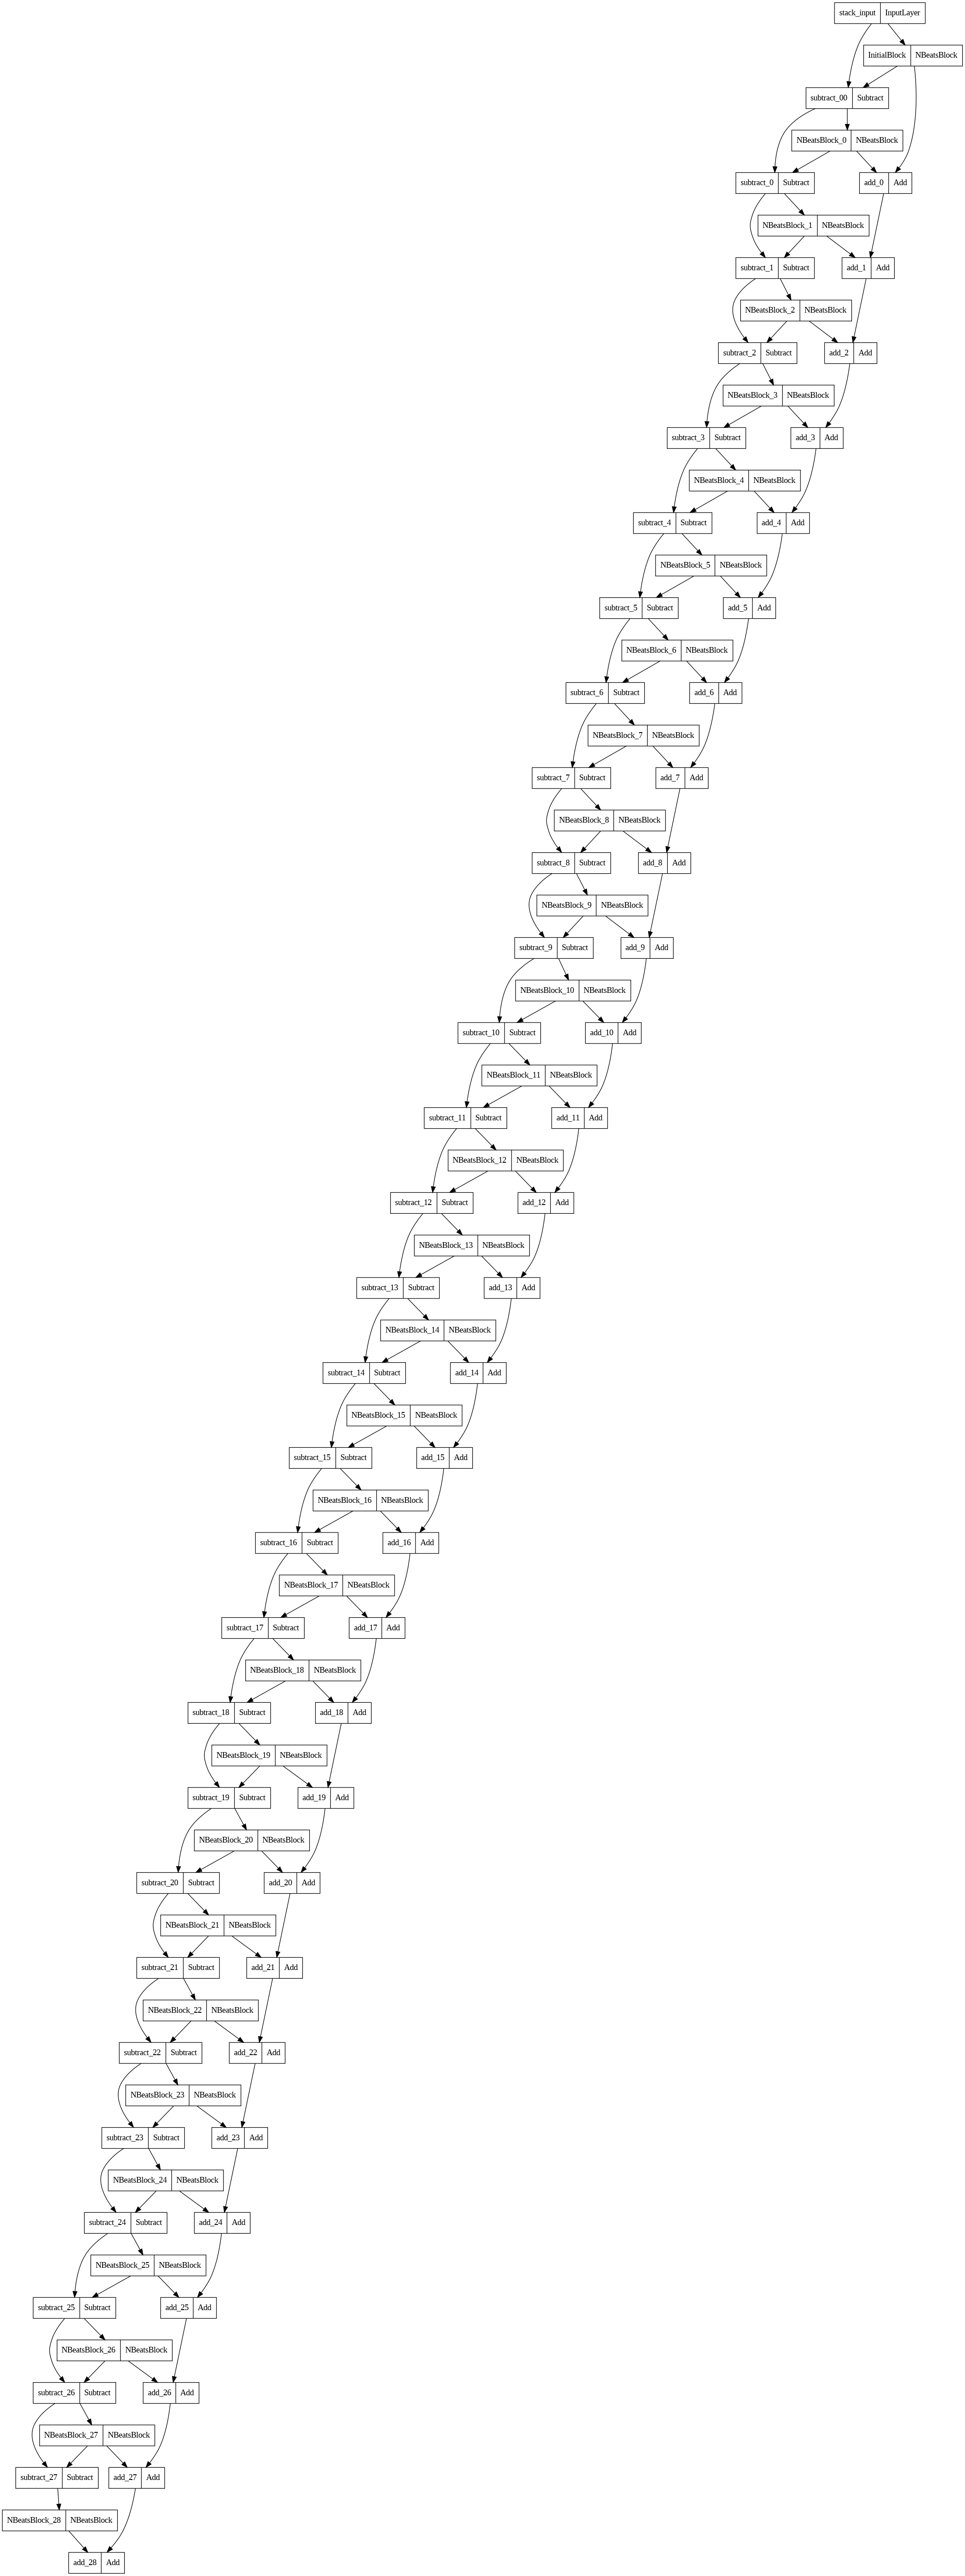

In [116]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

Now that is one good looking model!

It even looks similar to the model shown in Figure 1 of the N-BEATS paper.

Looks like our Functional API usage did the trick!

> 🔑 **Note:** Our N-BEATS model replicates the N-BEATS **generic architecture**, the training setups are largely the same, except for the N-BEATS paper used an ensemble of models to make predictions (multiple different loss functions and multiple different lookback windows), see Table 18 of the N-BEATS paper for more. An extension could be to setup this kind of training regime and see if it improves performance.

How about we try and save our version of the N-BEATS model?

In [117]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

You'll notice a warning appears telling us to fully save our model correctly we need to implement a [`get_config()`](https://www.tensorflow.org/guide/keras/save_and_serialize#how_savedmodel_handles_custom_objects) method in our custom layer class.

> 📖 **Resource:** If you would like to save and load the N-BEATS model or any other custom or subclassed layer/model configuration, you should overwrite the `get_config()` and optionally `from_config()` methods. See the [TensorFlow Custom Objects documentation](https://www.tensorflow.org/guide/keras/save_and_serialize#custom_objects) for more.

## Model 8: Creating an ensemble (stacking different models together)

Our next experiment is creating an [**ensemble** of models](https://en.wikipedia.org/wiki/Ensemble_learning).

An **ensemble** involves training and combining multiple different models on the same problem. Ensemble models are often the types of models you'll see winning data science competitions on websites like Kaggle.

For example, in the N-BEATS paper, they trained an ensemble of models (180 in total, see section 3.4) to achieve the results they did using a combination of:
  * Different loss functions (sMAPE, MASE and MAPE)
  * Different window sizes (2 x horizon, 3 x horizon, 4 x horizon...)

The benefit of ensembling models is you get the "decision of the crowd effect". Rather than relying on a single model's predictions, you can [take the average or median of many different models](https://en.wikipedia.org/wiki/Ensemble_forecasting).

The keyword being: different.

It wouldn't make sense to train the same model 10 times on the same data and then average the predictions.

Fortunately, due to their random initialization, even deep learning models with the same architecture can produce different results.

What I mean by this is each time you create a deep learning model, it starts with random patterns (weights & biases) and then it adjusts these random patterns to better suit the dataset it's being trained on.

However, the process it adjusts these patterns is often a form of guided randomness as well (the SGD optimizer stands for stochastic or random gradient descent).

To create our ensemble models we're going to be using a combination of:
* Different loss functions (MAE, MSE, MAPE)
* Randomly initialized models

Essentially, we'll be creating a suite of different models all attempting to model the same data.

And hopefully the combined predictive power of each model is better than a single model on its own.

Let's find out!

We'll start by creating a function to produce a list of different models trained with different loss functions. Each layer in the ensemble models will be initialized with a random normal [(Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution) using [He normal initialization](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal), this'll help estimating the prediction intervals later on.

> 🔑 **Note:** In your machine leanring experiments, you may have already deal with examples of ensemble models. Algorithms such as the [random forest model](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) are a form of ensemble, it uses a number of randomly created decision trees where each individual tree may perform poorly but when combined gives great results.


### Constructing and fitting an ensemble of models (using different loss functions)

In [118]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

Ensemble model creator function created!

Let's try it out by running `num_iter=5` runs for 1000 epochs. This will result in 15 total models (5 for each different loss function).

Of course, these numbers could be tweaked to create more models trained for longer.

> 🔑 **Note:** With ensembles, you'll generally find more total models means better performance. However, this comes with the tradeoff of having to train more models (longer training time) and make predictions with more models (longer prediction time).



In [119]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 258: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 240: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 340: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 134: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 902: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 238: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 270: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 370: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu


### Making predictions with an ensemble model

In [120]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [121]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 43ms/step


<tf.Tensor: shape=(15, 729), dtype=float32, numpy=
array([[48399.258, 48626.082, 48064.082, ..., 26617.117, 26901.56 ,
        27022.025],
       [47737.418, 48287.582, 48170.375, ..., 26688.518, 26908.547,
        26977.45 ],
       [48124.746, 48714.215, 48610.82 , ..., 26769.615, 26945.469,
        27088.889],
       ...,
       [47850.74 , 48520.992, 48664.945, ..., 26696.875, 26908.86 ,
        27044.918],
       [47184.83 , 48432.277, 47967.91 , ..., 26502.713, 26829.69 ,
        27031.541],
       [48148.555, 48332.61 , 48691.555, ..., 26786.432, 26899.299,
        26970.244]], dtype=float32)>

Now we've got a set of ensemble predictions, we can evaluate them against the ground truth values.

However, since we've trained 15 models, there's going to be 15 sets of predictions. Rather than comparing every set of predictions to the ground truth, let's take the median (you could also take the mean too but [the median is usually more robust than the mean](https://www.johndcook.com/blog/2009/03/06/student-t-distribution-mean-median/)).

In [122]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 287.04883,
 'mse': 188421.27,
 'rmse': 434.07516,
 'mape': 0.8881447,
 'mase': 0.73816806}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

Right now all of our model's (prior to the ensemble model) are predicting single points.

Meaning, given a set of `WINDOW_SIZE=7` values, the model will predict `HORIZION=1`.

But what might be more helpful than a single value?

Perhaps a range of values?

For example, if a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD?

Knowing the range of values a model is predicting may help you make better decisions for your forecasts.

You'd know that although the model is predicting 50,000USD (a **point prediction**, or single value in time), the value could actually be within the range 48,000USD to 52,000USD (of course, the value could also be *outside* of this range as well, but we'll get to that later).

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

Why?

Because **point predictions** are almost always going to be wrong. So having a range of values can help with decision making.

> 📖 **Resource(s):**
> * The steps we're about to take have been inspired by the Machine Learning Mastery blog post [*Prediction Intervals for Deep Learning Neural Networks*](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/).

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by [1.96](https://en.wikipedia.org/wiki/1.96) (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


In [123]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

Wonderful, now we've got the upper and lower bounds for the the 95% prediction interval, let's plot them against our ensemble model's predictions.

To do so, we can use our plotting function as well as the [`matplotlib.pyplot.fill_between()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method to shade in the space between the upper and lower bounds.

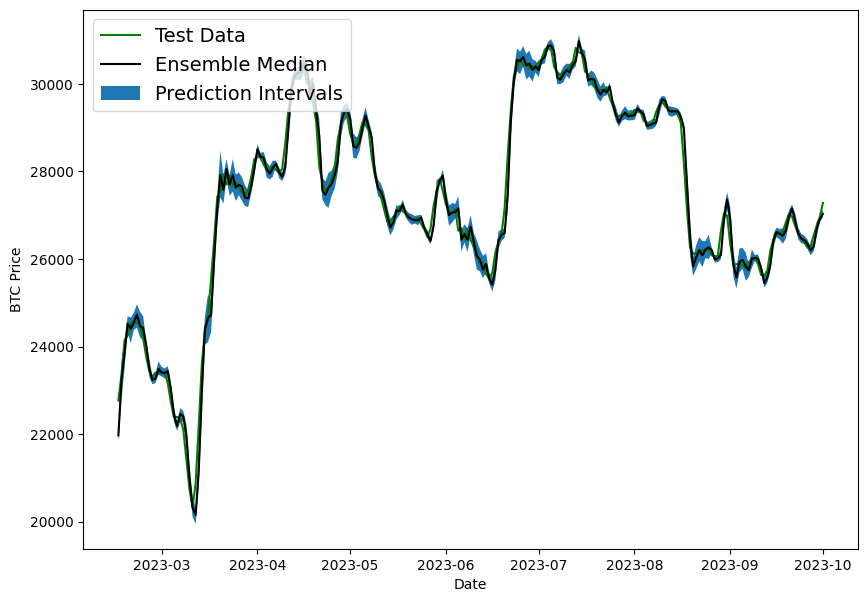

In [124]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

We've just plotted:
* The test data (the ground truth Bitcoin prices)
* The median of the ensemble predictions
* The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)

What can you tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be **overfitting** the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

> 🔑 **Note:** Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian

## Aside: two types of uncertainty (coconut and subway)

Inheritly, you know you cannot predict the future.

That doesn't mean trying to isn't valuable.

For many things, future predictions are helpful. Such as knowing the bus you're trying to catch to the library leaves at 10:08am. The time 10:08am is a **point prediction**, if the bus left at a random time every day, how helpful would it be?

Just like saying the price of Bitcoin tomorrow will be 50,000USD is a point prediction.

However, as we've discussed knowing a **prediction interval** or **uncertainty estimate** can be as helpful or even more helpful than a point prediction itself.

Uncertainty estimates seek out to qualitatively and quantitatively answer the questions:
* What can my model know? (with perfect data, what's possible to learn?)
* What doesn't my model know? (what can a model never predict?)

There are two types of uncertainty in machine learning you should be aware of:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.
  * Let's say your train is scheduled to arrive at 10:08am but very rarely does it arrive at *exactly* 10:08am. You know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data you could imagine, this level of uncertainty is still going to be present (much of it being noise).
  * When we measured prediction intervals, we were measuring a form of subway uncertainty for Bitcoin price predictions (a little either side of the point prediction).

* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.
  * The analogy for coconut uncertainty involves whether or not you'd get hit on the head by a coconut when going to a beach.
    * If you were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing?
    * But you could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
  * Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data you're modelling.

The lines between these are blurred (one type of uncertainty can change forms into the other) and they can be confusing at first but are important to keep in mind for any kind of time series prediction.

If you ignore the uncertanties, are you really going to get a reliable prediction?

Perhaps another example might help.

### Uncertainty in dating

Let's say you're going on a First Date Feedback Radio Show to help improve your dating skills.

Where you go on a blind first date with a girl (feel free to replace girl with your own preference) and the radio hosts record the date and then playback snippets of where you could've improved.

And now let's add a twist.

Last week your friend went on the same show. They told you about the girl they met and how the conversation went.

Because you're now a machine learning engineer, you decide to build a machine learning model to help you with first date conversations.

What levels of uncertainty do we have here?

From an **aleatory uncertainty** (data) point of view, no matter how many conversations of first dates you collect, the conversation you end up having will likely be different to the rest (the best conversations have no subject and appear random).

From an **epistemic uncertainty** (model) point of view, if the date is truly blind and both parties don't know who they're seeing until they meet in person, the epistemic uncertainty would be high. Because now you have no idea who the person you're going to meet is nor what you might talk about.

However, the level of epistemic uncertainty would be reduced if your friend told about the girl they went on a date with last week on the show and it turns out you're going on a date with the same girl.

But even though you know a little bit about the girl, your **aleatory uncertainty** (or subway uncertainty) is still high because you're not sure where the conversation will go.

If you're wondering where above scenario came from, it happened to me this morning. Good timing right?

## Model 9: Train a model on the full historical data to make predictions into future

What would a forecasting model be worth if we didn't use it to predict into the future?

It's time we created a model which is able to make future predictions on the price of Bitcoin.

To make predictions into the future, we'll train a model on the full dataset and then get to make predictions to some future horizon.

Why use the full dataset?

Previously, we split our data into training and test sets to evaluate how our model did on pseudo-future data (the test set).

But since the goal of a forecasting model is to predict values into the actual-future, we won't be using a test set.

> 🔑 **Note:** Forecasting models need to be retrained every time a forecast is made. Why? Because if Bitcoin prices are updated daily and you predict the price for tomorrow. Your model is only really valid for one day. When a new price comes out (e.g. the next day), you'll have to retrain your model to incorporate that new price to predict the next forecast.

Let's get some data ready.

In [125]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-03,131.433334,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-04,130.266668,25,131.433334,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-05,134.833333,25,130.266668,131.433334,NaN,NaN,NaN,NaN,NaN
2013-10-06,137.100001,25,134.833333,130.266668,131.433334,NaN,NaN,NaN,NaN
2013-10-07,136.766668,25,137.100001,134.833333,130.266668,131.433334,NaN,NaN,NaN


In [126]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

Windows and labels ready! Let's turn them into performance optimized TensorFlow Datasets by:
1. Turning `X_all` and `y_all` into tensor Datasets using [`tf.data.Dataset.from_tensor_slices()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)
2. Combining the features and labels into a Dataset tuple using [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)
3. Batch and prefetch the data using [`tf.data.Dataset.batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) and [`tf.data.Dataset.prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) respectively

In [127]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

And now let's create a model similar to `model_1` except with an extra layer, we'll also fit it to the entire dataset for 100 epochs (feel free to play around with the number of epochs or callbacks here, you've got the skills to now).

In [128]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

### Make predictions on the future

Let's predict the future and get rich!

Well... maybe not.

As you've seen so far, our machine learning models have performed quite poorly at predicting the price of Bitcoin (time series forecasting in open systems is typically a game of luck), often worse than the naive forecast.

That doesn't mean we can't use our models to *try* and predict into the future right?

To do so, let's start by defining a variable `INTO_FUTURE` which decides how many timesteps we'd like to predict into the future.

In [129]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

Alright, let's create a function which returns `INTO_FUTURE` forecasted values using a trained model.

To do so, we'll build the following steps:
1. Function which takes as input:
  * a list of values (the Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the value and append the latest prediction
  * Eventually future predictions will be made using the model's own previous predictions as input

In [130]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

Nice! Time to bring BitPredict 💰📈 to life and make future forecasts of the price of Bitcoin.

> 🛠 **Exercise:** In terms of a forecasting model, what might another approach to our `make_future_forecasts()` function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.
>
> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.
>
> As it is, the `make_future_forecasts()` function skips the retraining of a model part.

In [131]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 49ms/step
Predicting on: 
 [26377.79947917 26257.69986979 26295.89973958 26535.86653646
 26766.16666667 26965.03320312 27282.33333333] -> Prediction: 26431.453125

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [26257.69986979 26295.89973958 26535.86653646 26766.16666667
 26965.03320312 27282.33333333 26431.453125  ] -> Prediction: 26389.263671875

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [26295.89973958 26535.86653646 26766.16666667 26965.03320312
 27282.33333333 26431.453125   26389.26367188] -> Prediction: 26472.109375

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [26535.86653646 26766.16666667 26965.03320312 27282.33333333
 26431.453125   26389.26367188 26472.109375  ] -> Prediction: 26871.48828125

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [26766.16666667 26965.03320312 27282.33333333 26431.453125
 26389.26367188 26472.109375   26871.488281

In [132]:
future_forecast[:10]

[26431.453,
 26389.264,
 26472.11,
 26871.488,
 27251.553,
 27261.793,
 26978.234,
 26454.61,
 26518.906,
 26869.082]

### Plot future forecasts

This is so exciting! Forecasts made!

But right now, they're just numbers on a page.

Let's bring them to life by adhering to the data explorer's motto: visualize, visualize, visualize!

To plot our model's future forecasts against the historical data of Bitcoin, we're going to need a series of future dates (future dates from the final date of where our dataset ends).

How about we create a function to return a date range from some specified start date to a specified number of days into the future (`INTO_FUTURE`).

To do so, we'll use a combination of NumPy's [`datetime64` datatype](https://numpy.org/doc/stable/reference/arrays.datetime.html) (our Bitcoin dates are already in this datatype) as well as NumPy's `timedelta64` method which helps to create date ranges.

In [133]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

The start date of our forecasted dates will be the last date of our dataset.

In [134]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2023-10-01 00:00:00')

In [135]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
       '2023-10-06', '2023-10-07', '2023-10-08', '2023-10-09',
       '2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13',
       '2023-10-14', '2023-10-15'], dtype='datetime64[D]')

Look at that! We've now got a list of dates we can use to visualize our future Bitcoin predictions.

But to make sure the lines of the plot connect (try not running the cell below and then plotting the data to see what I mean), let's insert the last timestep and Bitcoin price of our training data to the `next_time_steps` and `future_forecast` arrays.

In [136]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04',
        '2023-10-05', '2023-10-06', '2023-10-07', '2023-10-08',
        '2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12',
        '2023-10-13', '2023-10-14', '2023-10-15'], dtype='datetime64[D]'),
 array([27282.334, 26431.453, 26389.264, 26472.11 , 26871.488, 27251.553,
        27261.793, 26978.234, 26454.61 , 26518.906, 26869.082, 27370.89 ,
        27535.988, 27226.918, 26761.934], dtype=float32))

In [137]:
next_time_steps.shape, future_forecast.shape

((15,), (15,))

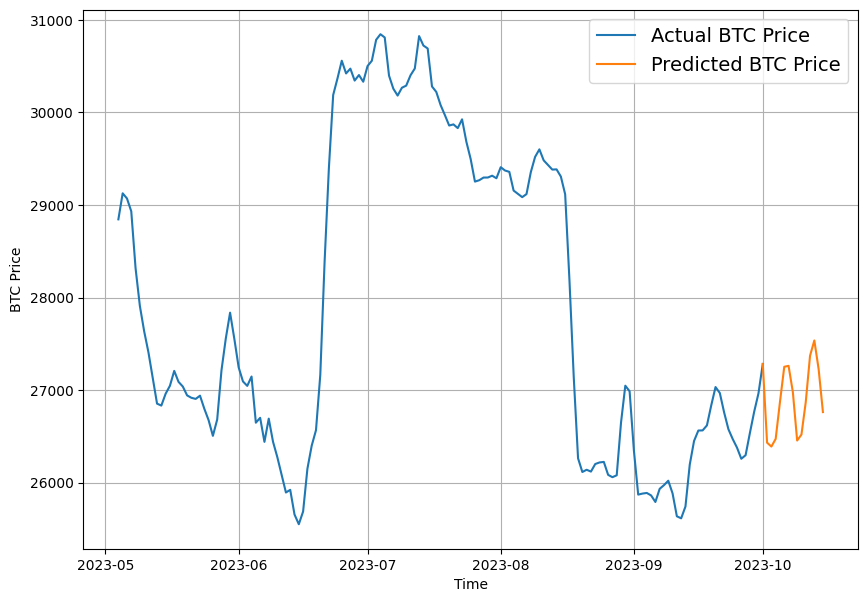

In [155]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, prices, start=3500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Hmmm... how did our model go?

It looks like our predictions are starting to form a bit of a cyclic pattern (up and down in the same way).

Perhaps that's due to our model overfitting the training data and not generalizing well for future data. Also, as you could imagine, the further you predict into the future, the higher your chance for error (try seeing what happens when you predict 100 days into the future).

But of course, we can't measure these predictions as they are because after all, they're predictions into the actual-future (by the time you read this, the future might have already happened, if so, how did the model go?).

> 🔑 **Note:** A reminder, the predictions we've made here are not financial advice. And by now, you should be well aware of just how poor machine learning models can be at forecasting values in an open system - anyone promising you a model which can "beat the market" is likely trying to scam you, oblivious to their errors or very lucky.


## Model 10: Why forecasting is BS (the turkey problem 🦃)

When creating any kind of forecast, you must keep the **turkey problem** in mind.

The **turkey problem** is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

The story goes, a turkey lives a good life for 1000 days, being fed every day and taken care of by its owners until the evening before Thanksgiving.

Based on the turkey's observational data, it has no reason to believe things shouldn't keep going the way they are.

In other words, how could a turkey possibly predict that on day 1001, after 1000 consectutive good days, it was about to have a far from ideal day.

How does this relate to predicting the price of Bitcoin (or the price of any stock or figure in an open market)?

You could have the historical data of Bitcoin for its entire existence and build a model which predicts it perfectly.

But then one day for some unknown and unpredictable reason, the price of Bitcoin plummets 100x in a single day.

Of course, this kind of scenario is unlikely.

But that doesn't take away from its significance.

Think about it in your own life, how many times have the most significant events happened seemingly out of the blue?

As in, you could go to a cafe and run into the love of your life, despite visiting the same cafe for 10-years straight and never running into this person before.

The same thing goes for predicting the price of Bitcoin, you could make money for 10-years straight and then lose it all in a single day.

It doesn't matter how many times you get paid, it matters the amount you get paid.

> 📖 **Resource:** If you'd like to learn more about the turkey problem, I'd recommend the following:
* [Explaining both the XIV trade and why forecasting is BS](https://youtu.be/hRwimmE2wEk) by Nassim Taleb
* [*The Black Swan*](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable) by Nassim Taleb (epsecially Chapter 4 which outlines and discusses the turkey problem)

Let's get specific and see how the turkey problem effects us modelling the historical and future price of Bitcoin.

To do so, we're going to manufacture a highly unlikely data point into the historical price of Bitcoin, the price falling 100x in one day.

> 🔑 **Note:** A very unlikely and unpredictable event such as the price of Bitcoin falling 100x in a single day (note: the adjective "unlikely" is based on the historical price changes of Bitcoin) is also referred to a [**Black Swan** event](https://en.wikipedia.org/wiki/Black_swan_theory). A Black Swan event is an unknown unknown, you have no way of predicting whether or not it will happen but these kind of events often have a large impact.

In [139]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = prices.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [140]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

array([26758.96679688, 26577.03320312, 26470.86653646, 26377.79947917,
       26257.69986979, 26295.89973958, 26535.86653646, 26766.16666667,
       26965.03320312,   272.82333333])

Notice the last value is 100x lower than what it actually was (remember, this is not a real data point, its only to illustrate the effects of the turkey problem).

Now we've got Bitcoin prices including a turkey problem data point, let's get the timesteps.

In [141]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2023-09-22T00:00:00.000000000', '2023-09-23T00:00:00.000000000',
       '2023-09-24T00:00:00.000000000', '2023-09-25T00:00:00.000000000',
       '2023-09-26T00:00:00.000000000', '2023-09-27T00:00:00.000000000',
       '2023-09-28T00:00:00.000000000', '2023-09-29T00:00:00.000000000',
       '2023-09-30T00:00:00.000000000', '2023-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

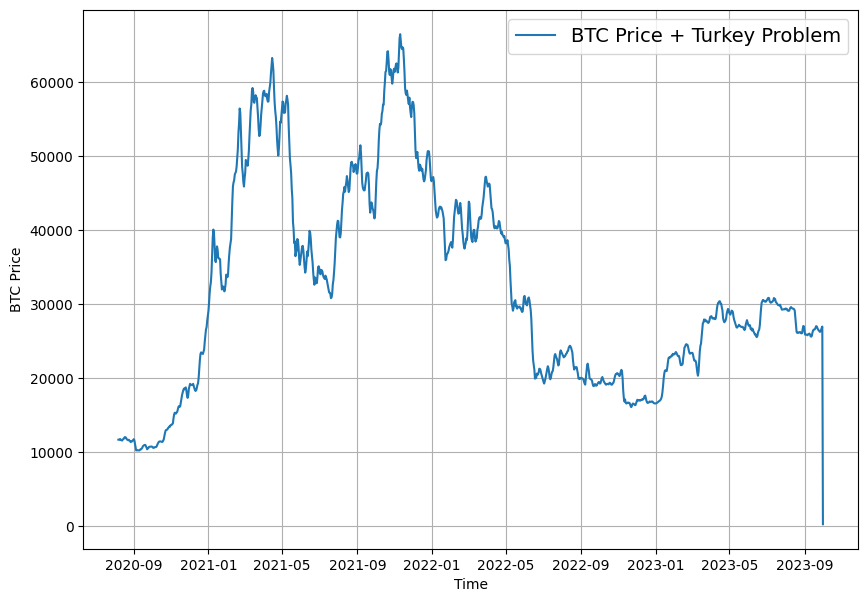

In [142]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

How do you think building a model on this data will go?

Remember, all we've changed is a single data point out of our entire dataset.

Before we build a model, let's create some windowed datasets with our turkey data.

In [143]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650]]), (3644, 8))


(2915, 729, 2915, 729)

### Building a turkey model (model to predict on turkey data)

With our updated data, we only changed 1 value.

Let's see how it effects a model.

To keep things comparable to previous models, we'll create a `turkey_model` which is a clone of `model_1` (same architecture, but different data).

That way, when we evaluate the `turkey_model` we can compare its results to `model_1_results` and see how much a single data point can influence a model's performance.


In [144]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [145]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 411.5381


411.53814697265625

In [146]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 373.8874


373.8873596191406

In [147]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

23/23 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47801.273, 48825.81 , 48471.484, 49784.188, 52863.04 , 54622.008,
       54801.44 , 54021.457, 54328.883, 56004.086], dtype=float32)>

In [148]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 13206.176,
 'mse': 301930940.0,
 'rmse': 16581.99,
 'mape': 60.261974,
 'mase': 31.066355}

And with just one value change, our error metrics go through the roof.

To make sure, let's remind ourselves of how `model_1` went on unmodified Bitcoin data (no turkey problem).

In [149]:
model_1_results

{'mae': 363.59637,
 'mse': 291241.3,
 'rmse': 539.6678,
 'mape': 1.1297927,
 'mase': 0.935016}

By changing just one value, the `turkey_model` MAE increases almost 30x over `model_1`.

Finally, we'll visualize the turkey predictions over the test turkey data.

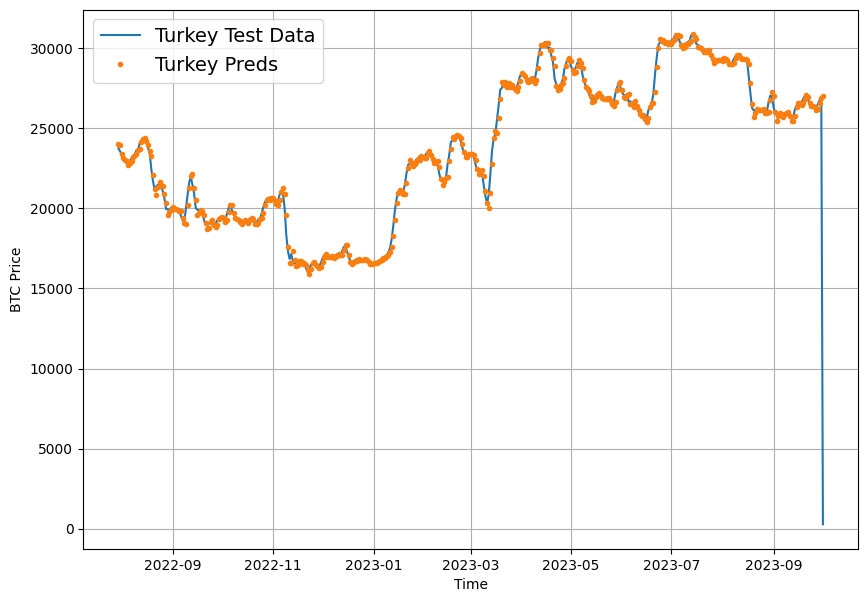

In [150]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

Why does this happen?

Why does our model fail to capture the turkey problem data point?

Think about it like this, just like a turkey who lives 1000 joyful days, based on observation alone has no reason to believe day 1001 won't be as joyful as the last, a model which has been trained on historical data of Bitcoin which has no single event where the price decreased by 100x in a day, has no reason to predict it will in the future.

A model cannot predict anything in the future outside of the distribution it was trained on.

In turn, highly unlikely price movements (based on historical movements), upward or downward will likely never be part of a forecast.

However, as we've seen, despite their unlikeliness, these events can have huuuuuuuuge impacts to the performance of our models.

> 📖 **Resource:** For a great article which discusses Black Swan events and how they often get ignored due to the assumption that historical events come from a certain distribution and that future events will come from the same distribution see [*Black Swans, Normal Distributions and Supply Chain Risk*](https://spendmatters.com/uk/black-swans-normal-distributions-supply-chain-risk/) by Spend Matters.


## Compare Models

We've trained a bunch of models.

And if anything, we've seen just how poorly machine learning and deep learning models are at forecasting the price of Bitcoin (or any kind of open market value).

To highlight this, let's compare the results of all of the modelling experiments we've performed so far.

In [151]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,392.598816,3.497558e+05,591.401550,1.223562,1.005801
model_1_dense_w7_h1,363.596375,2.912413e+05,539.667786,1.129793,0.935016
model_2_dense_w30_h1,427.816650,4.035027e+05,635.218628,1.340522,1.115881
model_3_dense_w30_h7,1236.034668,3.602130e+06,1408.815552,3.960338,3.199255
model_4_CONV1D,340.411194,2.533591e+05,503.347870,1.053046,0.875394
model_5_LSTM,339.661194,2.545240e+05,504.503693,1.058305,0.873465
model_6_multivariate,302.139771,2.081109e+05,456.191711,0.930409,0.776976
model_8_NBEATs,266.518036,1.692837e+05,411.441010,0.829616,0.685372
model_9_ensemble,287.048828,1.884213e+05,434.075165,0.888145,0.738168
model_10_turkey,13206.175781,3.019309e+08,16581.990234,60.261974,31.066355


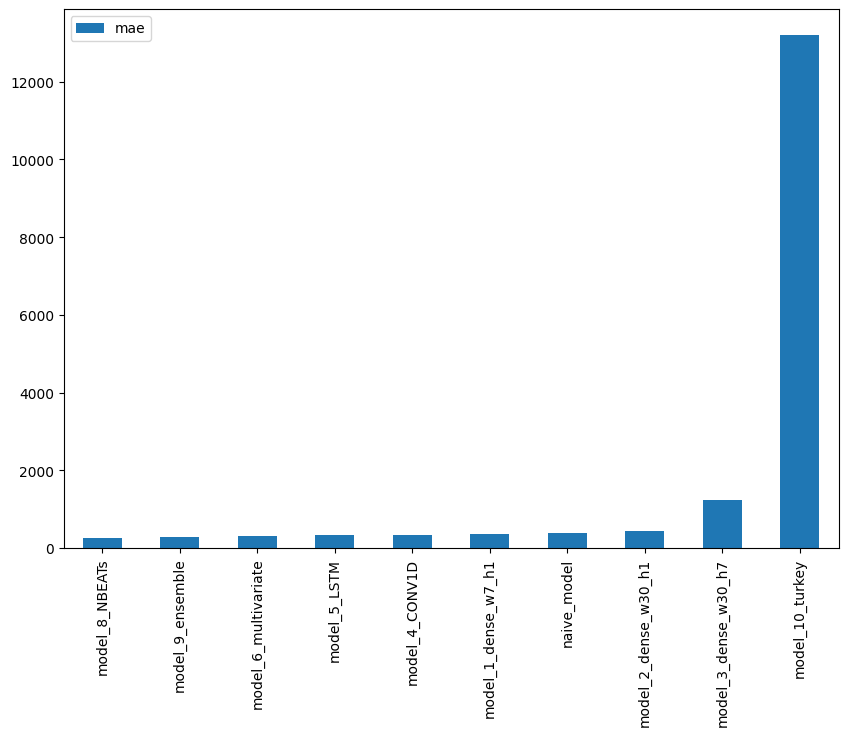

In [152]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

The majority of our deep learning models perform on par or only slightly better than the naive model. And for the turkey model, changing a single data point destroys its performance.

> 🔑 **Note:** Just because one type of model performs better here doesn't mean it'll perform the best elsewhere (and vice versa, just because one model performs poorly here, doesn't mean it'll perform poorly elsewhere).

As I said at the start, this is not financial advice.

After what we've gone through, you'll now have some of the skills required to callout BS for any future tutorial or blog post or investment sales guide claiming to have model which is able to predict the futrue.

Mark Saroufim's Tweet sums this up nicely (stock market forecasting with a machine learning model is just as reliable as palm reading).

*Beware the tutorials or trading courses which claim to use some kind of algorithm to beat the market (an open system), they're likely a scam or the creator is very lucky and hasn't yet come across a turkey problem.*

Don't let these results get you down though, forecasting in a closed system (such as predicting the demand of electricity) often yields quite usable results.

If anything, this module teaches anti-knowledge. Knowing that forecasting methods usually *don't* perform well in open systems.

Plus, sometimes not knowing the future is a benefit. A known future is already the past.



In [157]:
# --------------------------------------------------------------------------- END ----------------------------------------------------------------------------------------------